In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from NewsSentiment import TargetSentimentClassifier

/home/itay/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
tsc = TargetSentimentClassifier()
tsc.infer_from_text

NameError: name 'TargetSentimentClassifier' is not defined

In [67]:
cnn = pd.read_csv('netanyahu_cnn_news_sentiment.csv')
fox = pd.read_csv('netanyahu_fox_news_sentiment.csv')

In [77]:
def add_label(row):
    labels = {row['neg_s']: 'Negative', row['pos_s']:'Positive', row['neu_s']:'Neutral'}
    max_val = max(labels.keys())
    row['label'] = labels[max_val]
    row[labels[max_val]] = 1
    labels.pop(max_val)
    for key in labels.keys():
        row[labels[key]] = 0
    return row

cnn = cnn.apply(add_label, axis=1)
fox = fox.apply(add_label, axis=1)

    
    

In [42]:
cnn

,Negative,Neutral,Positive,compound,compound_s,date,index,label,neg,neg_s,neu,neu_s,pos,pos_s,title
0,1,0,0,0,0.006636,2023-02-26,0.0,Negative,0,0.133545,0,0.031795,0,0.016478,"About 160,000 people protest against Netanyahu..."
1,0,0,1,0,0.007478,2023-02-22,1.0,Positive,0,0.001929,0,0.006586,0,0.025383,11 Palestinians killed during Israeli raid tar...
2,0,1,0,0,0.026373,2023-02-23,2.0,Neutral,0,0.000699,0,0.061243,0,0.026293,Your flight from Israel might be about to get ...
3,0,0,1,0,0.058402,2023-02-23,3.0,Positive,0,0.011035,0,0.107827,0,0.121138,Israel launches airstrikes on Gaza after rocke...
4,1,0,0,0,-0.007558,2023-02-21,4.0,Negative,0,0.089799,0,0.087902,0,0.049572,Opinion: Netanyahu's 'reforms' are threatening...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,-0.001137,2021-12-10,95.0,Neutral,0,0.001271,0,0.041531,0,0.000676,A single sentence that perfectly captures the ...
96,1,0,0,0,-0.004557,2021-11-08,96.0,Negative,0,0.074770,0,0.012975,0,0.007494,Don't count on an end to the Joe Biden-Naftali...
97,1,0,0,0,-0.000888,2021-11-07,97.0,Negative,0,0.037794,0,0.000455,0,0.000213,"Israel doubles down against US, saying there i..."
98,0,1,0,0,0.069033,2021-10-12,98.0,Neutral,0,0.031551,0,0.236148,0,0.139709,Trump's inner circle takes a trip down memory ...


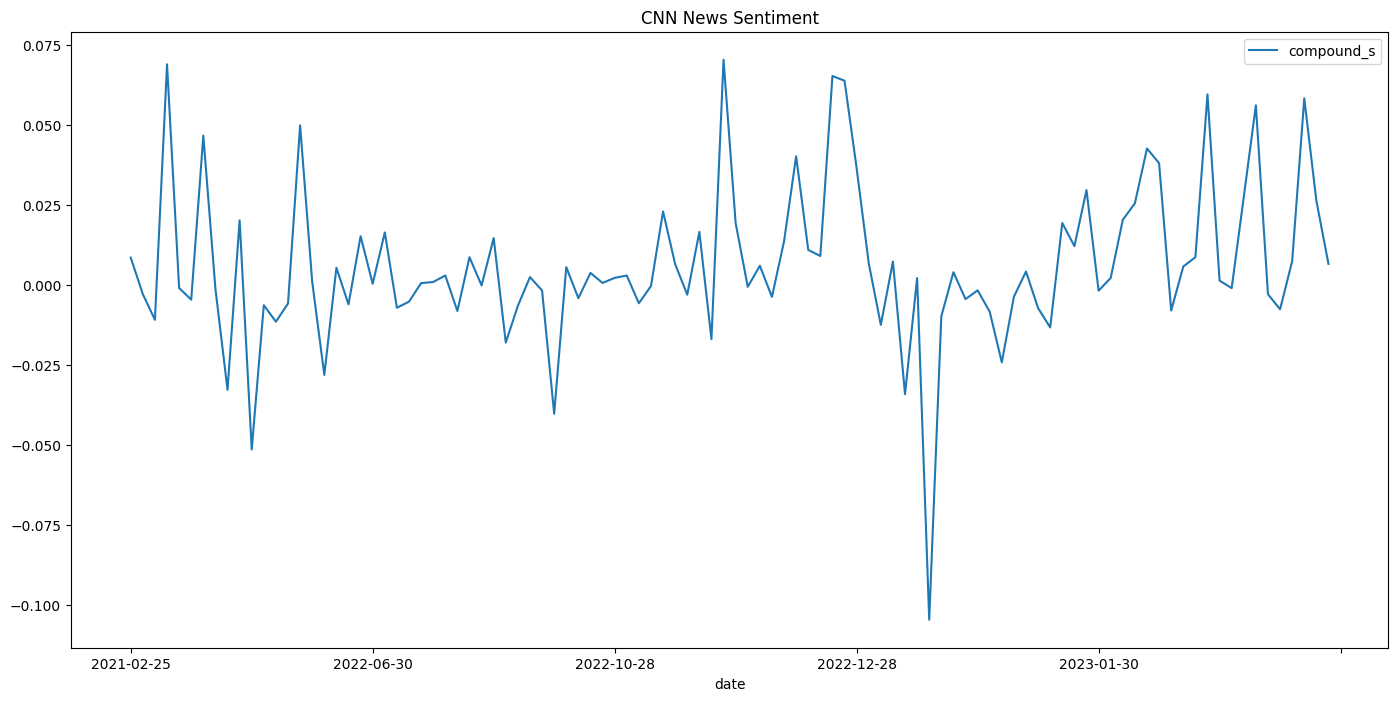

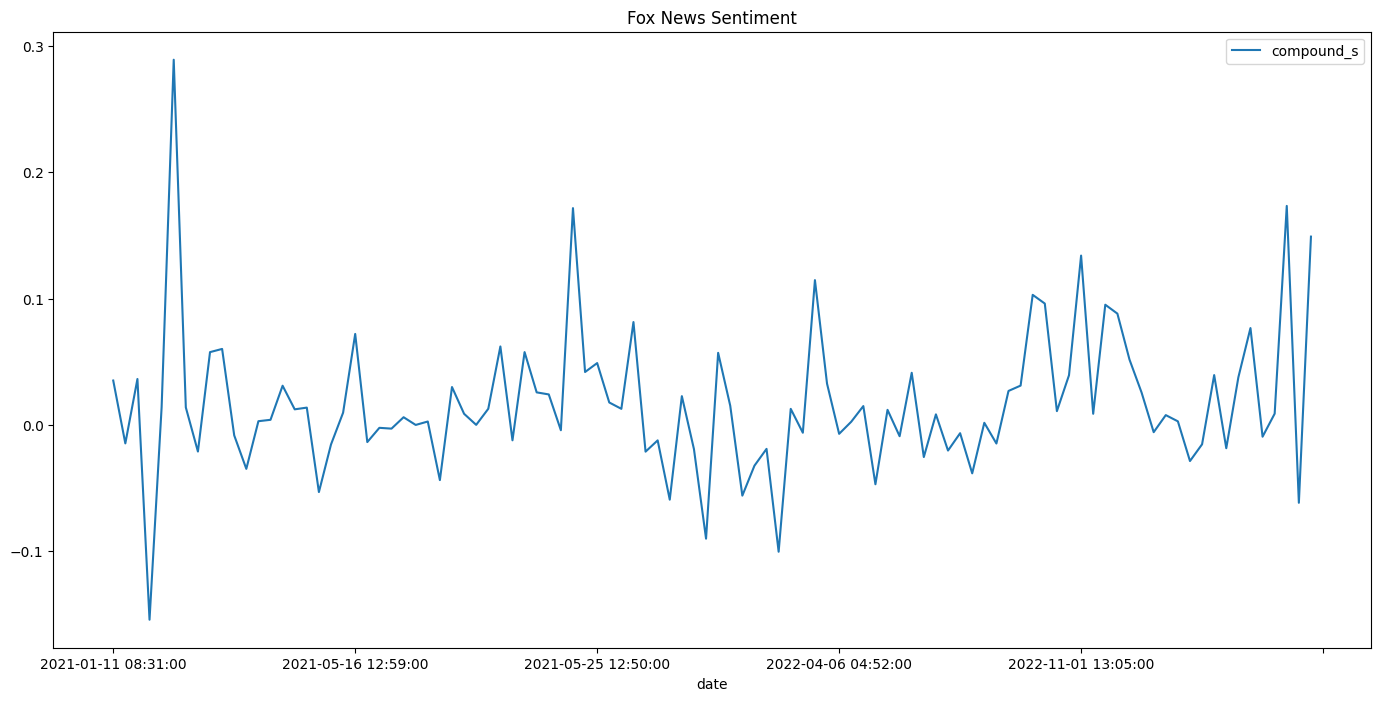

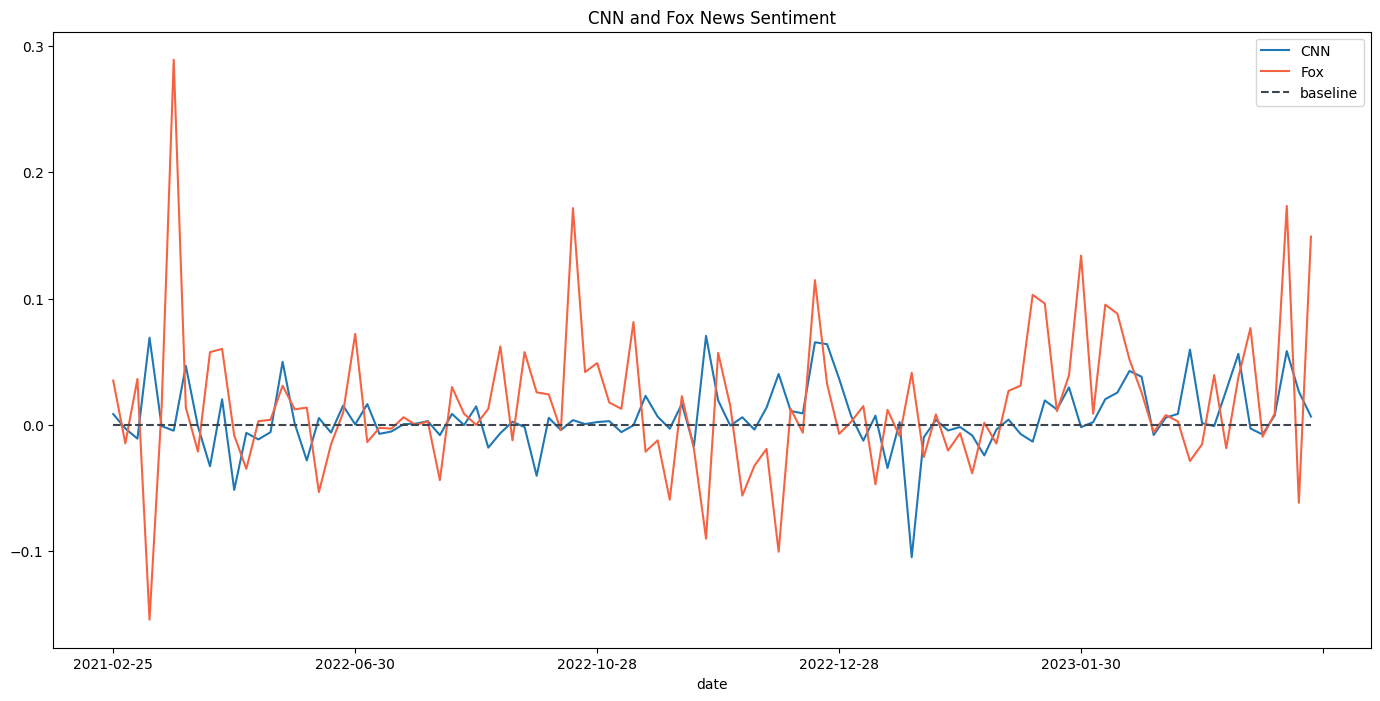

In [74]:
def plot(df:pd.DataFrame, vendor):
    df = df.sort_values(by=['date'])
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))


def joined_plot(df1:pd.DataFrame, df2:pd.DataFrame, vendor1, vendor2):    
    df1 = df1.sort_values(by=['date']).rename(columns={'compound_s': vendor1})
    df2 = df2.sort_values(by=['date']).rename(columns={'compound_s': vendor2})
    
    axes = df1.plot(x='date', y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', figsize=(17,8))
    df2.plot(x='date', y=vendor2, kind='line', ax=axes, color='#f56342')
    df3 = pd.DataFrame({'date': df1.date, 'baseline': [0.0]*len(df1)}).plot(x='date', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

plot(cnn, 'CNN')
plot(fox, 'Fox')
joined_plot(cnn, fox, 'CNN', 'Fox')

In [75]:
def add_month(row):
    parts = row['date'].split('-')
    row['month'] = parts[0] + '-' + parts[1]
    return row

cnn = cnn.apply(add_month, axis=1)
fox = fox.apply(add_month, axis=1)

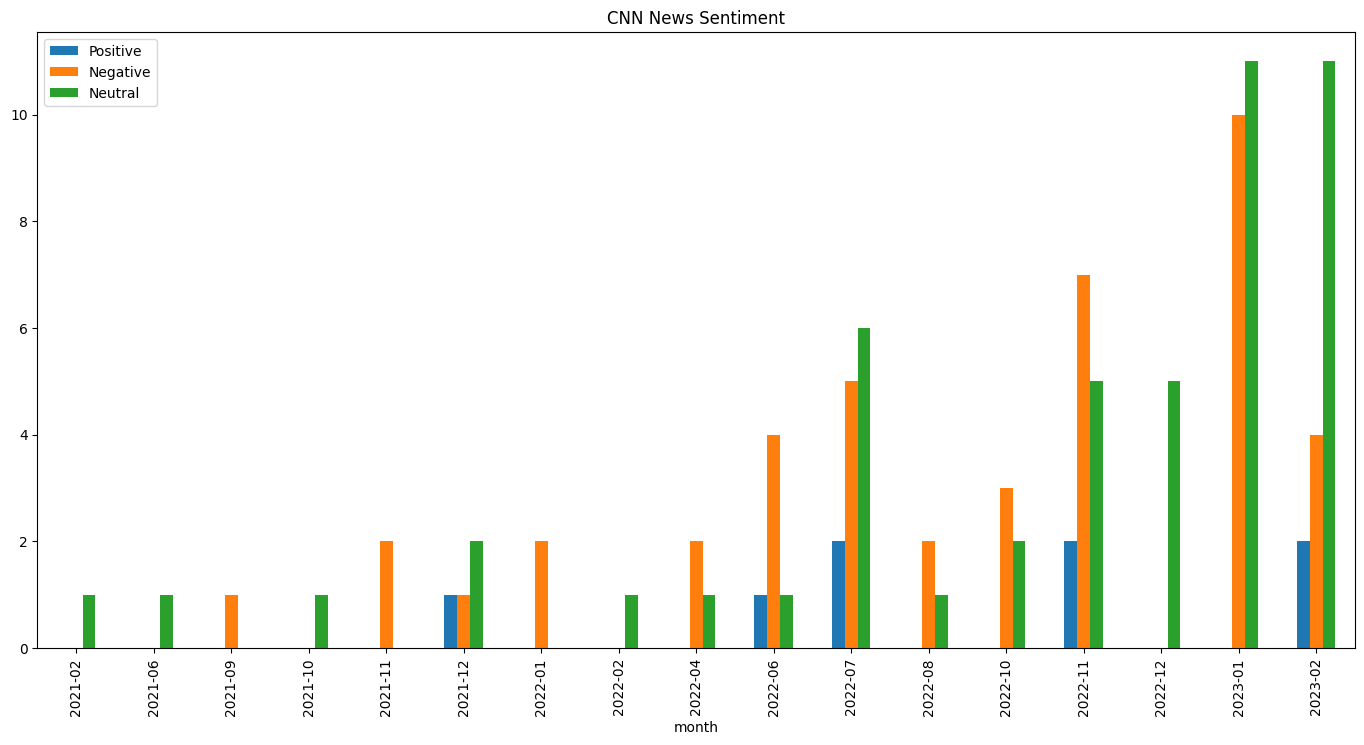

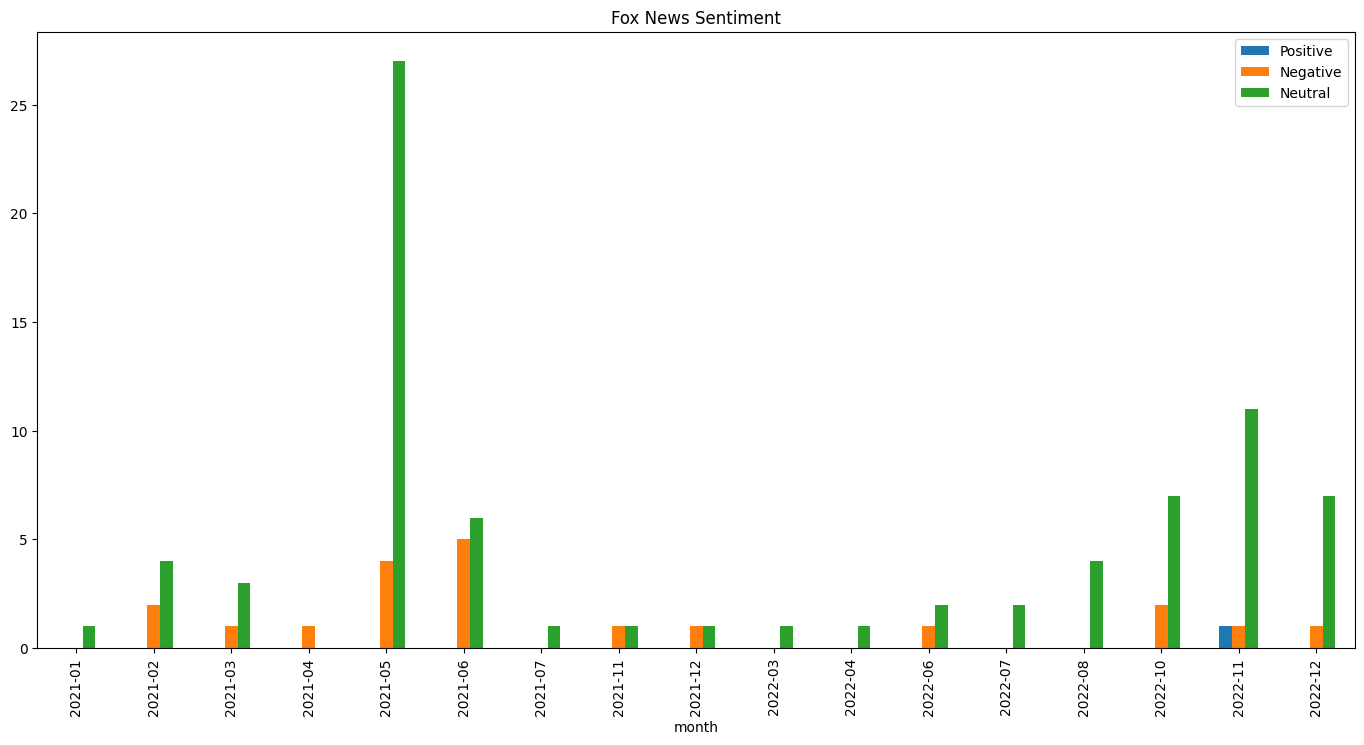

In [78]:
def plot_counts(df:pd.DataFrame, vendor):
    
    df.groupby('month').agg({'Positive':'sum', 'Negative':'sum', 'Neutral':'sum'}).plot(kind='bar', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_counts(cnn, 'CNN')
plot_counts(fox, 'Fox')


In [79]:
fox[cnn.month == '2021-12']

,Negative,Neutral,Positive,compound,compound_s,date,index,label,month,neg,neg_s,neu,neu_s,pos,pos_s,title
92,0.0,1,0.0,0,0.037700,2022-12-06 18:11:00,92.0,Neutral,2022-12,0,0.089506,0,0.264939,0,0.195555,Larry Kudlow: Former Israel Prime Minister Ben...
93,0.0,1,0.0,0,0.148976,2022-12-21 20:34:00,93.0,Neutral,2022-12,0,0.086400,0,0.364468,0,0.282466,Incoming Israeli Prime Minister Netanyahu says...
94,0.0,1,0.0,0,0.039425,2022-11-30 12:00:00,94.0,Neutral,2022-11,0,0.114939,0,0.407152,0,0.119418,Netanyahu: Iran nuclear deal is 'probably dead...
95,0.0,1,0.0,0,-0.018404,2022-12-04 15:14:00,95.0,Neutral,2022-12,0,0.203117,0,0.356601,0,0.117702,Netanyahu insists he won't step on 'landmine' ...
